In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data/imdb_tmdb_box.csv")

# 1. numbers and revenue

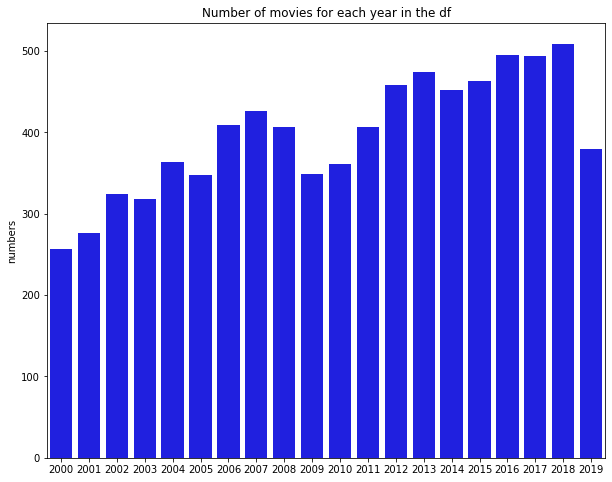

In [3]:
# number of movies per year
num_movies_year = df["year"].value_counts().to_frame().sort_index(axis = 0)
num_movies_year.columns = ["numbers"]



fig = plt.figure(figsize=(10,8));
sns.barplot(data=num_movies_year
             , y="numbers"
             , x=num_movies_year.index
             , color = "blue");
plt.title("Number of movies for each year in the df");

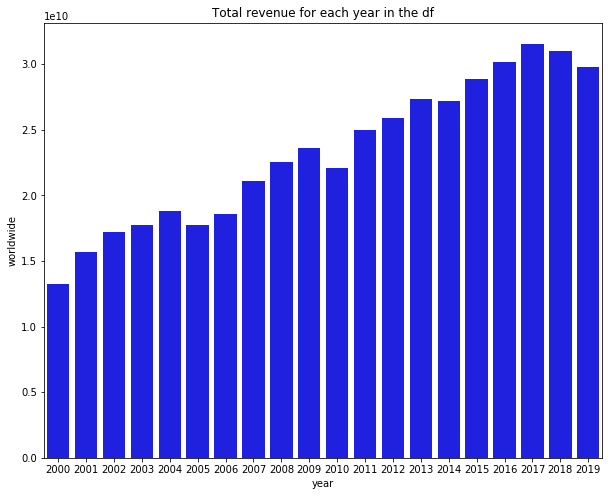

In [4]:
# total revenue per year

total_revenue_year = df[["year","worldwide"]].groupby(by = "year").sum()


fig = plt.figure(figsize=(10,8));
sns.barplot(data=total_revenue_year
             , y="worldwide"
             , x=total_revenue_year.index
             , color = "blue");
plt.title("Total revenue for each year in the df");


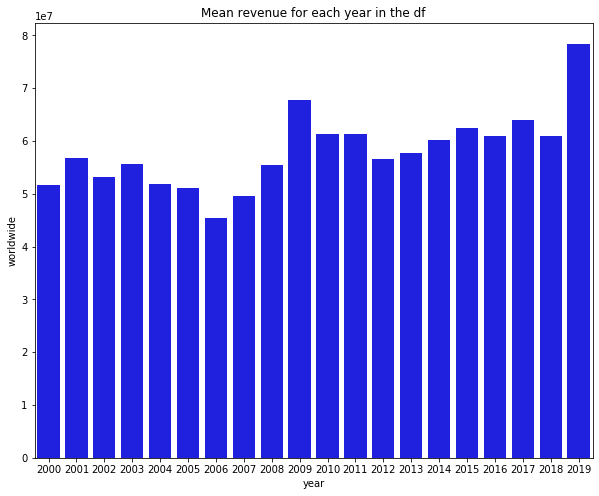

In [5]:
relative_revenue_year = df[["year","worldwide"]].groupby(by = "year").mean()


fig = plt.figure(figsize=(10,8));
sns.barplot(data=relative_revenue_year 
             , y="worldwide"
             , x=relative_revenue_year.index
             , color = "blue");
plt.title("Mean revenue for each year in the df");

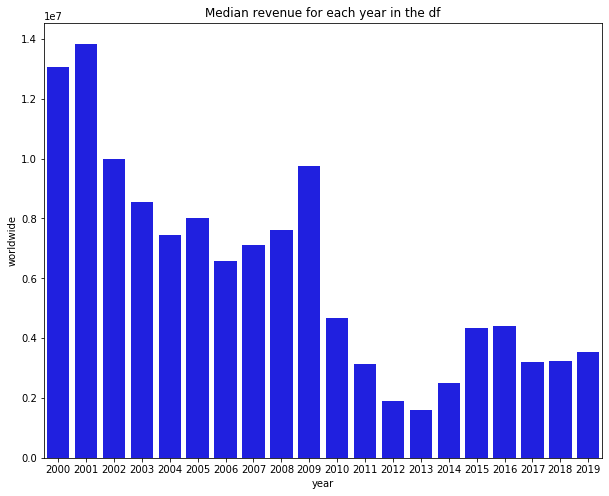

In [6]:
median_revenue_year = df[["year","worldwide"]].groupby(by = "year").median()

fig = plt.figure(figsize=(10,8));
sns.barplot(data=median_revenue_year 
             , y="worldwide"
             , x=median_revenue_year.index
             , color = "blue");
plt.title("Median revenue for each year in the df");

# 2. ratings

In [8]:
df

,Unnamed: 0,imdb_id,title,isAdult,year,minutes,genres,imdb_av_rating,imdb_num_votes,worldwide,domestic,tmdb_rating,tmdb_votes,popularity
0,0,tt0035423,Kate & Leopold,0,2001,118.0,"Comedy,Fantasy,Romance",6.4,75863.0,76019048,47121859.0,6.2,806,10.179
1,1,tt0113026,The Fantasticks,0,2000,86.0,"Musical,Romance",5.6,1086.0,49666,49666.0,5.6,17,2.730
2,2,tt0116748,Karobaar: The Business of Love,0,2000,180.0,"Drama,Romance",4.5,211.0,45200,45200.0,0.0,0,0.600
3,3,tt0118589,Glitter,0,2001,104.0,"Drama,Music,Romance",2.2,21033.0,5271666,4274407.0,3.7,66,4.855
4,4,tt0118694,In the Mood for Love,0,2000,98.0,"Drama,Romance",8.1,111412.0,12854953,2738980.0,8.1,964,13.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,7963,tt9826484,Trinity Seven The Movie 2: Heavens Library & C...,0,2019,63.0,"Action,Animation,Comedy",6.8,64.0,15712,15712.0,7.1,5,2.478
7964,7964,tt9844368,Out of Liberty,0,2019,111.0,"Drama,Western",4.5,213.0,265279,265279.0,10.0,1,6.427
7965,7965,tt9845398,End of the Century,0,2019,84.0,Drama,7.5,526.0,64880,64880.0,6.1,6,1.348
7966,7966,tt9896916,Pilgrim's Progress,0,2019,108.0,"Adventure,Animation,Family",5.2,294.0,3173282,1294596.0,7.0,3,2.522


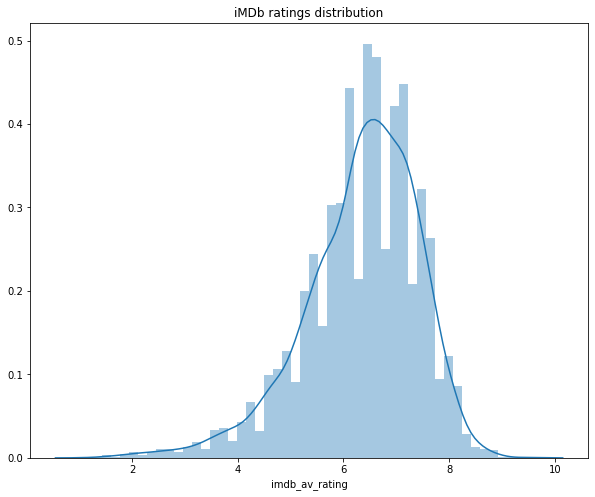

In [7]:
fig = plt.figure(figsize=(10,8));
sns.distplot(df["imdb_av_rating"][~df["imdb_av_rating"].isna()]);
plt.title("iMDb ratings distribution");


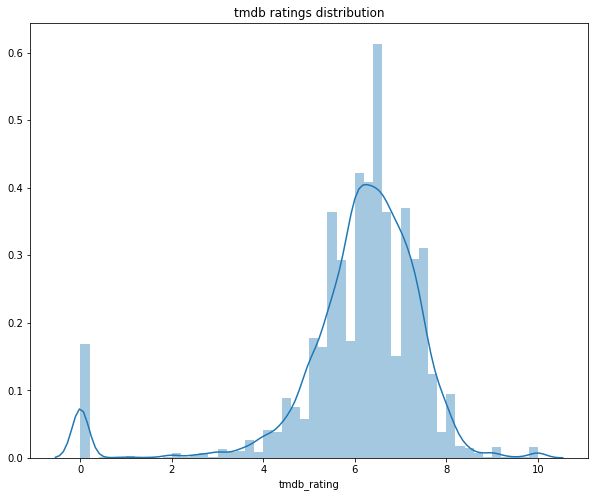

In [111]:
fig = plt.figure(figsize=(10,8));
sns.distplot(df.loc[~df["tmdb_rating"].isna(),"tmdb_rating"]);
plt.title("tmdb ratings distribution");

# 3. top tens

## a. top ten ratings

In [8]:
df[["title","imdb_av_rating"]].sort_values(by = "imdb_av_rating",ascending = False).head(10)

,title,imdb_av_rating
7595,"Hare Krishna! The Mantra, the Movement and the...",9.6
3428,The Twilight Zone: A 60th Anniversary Celebration,9.4
8024,Twiceland,9.1
2383,The Dark Knight,9.0
7927,BANDSTAND: The Broadway Musical on Screen,9.0
3449,Margaret Atwood: Live in Cinemas,9.0
100,The Lord of the Rings: The Return of the King,8.9
3891,Walking on Dead Fish,8.9
6738,The Unknowns,8.8
3403,Metallica & San Francisco Symphony - S&M2,8.8


## b. top ten revenue

In [9]:
df[["title","year","worldwide"]].sort_values(by = "worldwide",ascending = False).head(10)

,title,year,worldwide
6585,Avengers: Endgame,2019,2797800564
2616,Avatar,2009,2743856300
5720,Star Wars: Episode VII - The Force Awakens,2015,2068223624
6584,Avengers: Infinity War,2018,2048359754
1462,Jurassic World,2015,1670400637
7359,The Lion King,2019,1656943394
2919,The Avengers,2012,1518812988
5917,Furious 7,2015,1515047671
6737,Frozen II,2019,1405202167
5637,Avengers: Age of Ultron,2015,1402805868


In [10]:
len([])

0

# 4. inspecting genres

In [11]:
df["genres"] = df["genres"].apply(lambda x: x if x!="\\N" else "")

In [12]:
df["genres_list"] = df["genres"].apply(lambda x: x.split(","))

In [13]:
df["genre1"] = df["genres_list"].apply(lambda x: x[0] if len(x)>0 else "")
df["genre2"] = df["genres_list"].apply(lambda x: x[1] if len(x)>1 else "")
df["genre3"] = df["genres_list"].apply(lambda x: x[2] if len(x)>2 else "")
df.drop(columns = ["genres","genres_list"],inplace=True)

In [72]:
genres = []
for i in range(2):
    genres += list(df[f"genre{i+1}"].value_counts().index)
    
genres = list(set(genres))[1:]




genres_count = pd.DataFrame(index = genres)
genres_count["count"] = 0

for i in range(2):
    counts = df[f"genre{i+1}"].value_counts()
    for ind, count in counts.to_dict().items():
        if ind:
            genres_count.loc[ind,"count"] = genres_count.loc[ind,"count"] + count

        



### a. top genres by count

In [74]:
genres_count.sort_values(by = "count", ascending = False)

,count
Drama,3659
Comedy,2399
Action,1507
Documentary,1028
Crime,1002
Adventure,991
Romance,671
Biography,659
Horror,456
Animation,312


### b. top genres by revenue

In [75]:
def get_genre_subframe(frame,genre):
    return frame[(frame["genre1"] == genre) | (frame["genre2"] == genre) | (frame["genre3"] == genre)]

In [84]:
genres_info = genres_count.copy()
genres_info["total_rev"] = 0
genres_info["mean_rev"] = 0
genres_info["median_rev"] = 0
genres_info["imdb_rat"] = 0
genres_info["tmdb_rat"] = 0

for genre in genres:
    genres_info.loc[genre,"total_rev"] = get_genre_subframe(df,genre)["worldwide"].sum()
    genres_info.loc[genre,"mean_rev"] = get_genre_subframe(df,genre)["worldwide"].mean().astype(int)
    genres_info.loc[genre,"median_rev"] = get_genre_subframe(df,genre)["worldwide"].median().astype(int)
    genres_info.loc[genre,"imdb_rat"] = get_genre_subframe(df,genre)["imdb_av_rating"].mean()
    genres_info.loc[genre,"tmdb_rat"] = get_genre_subframe(df,genre)["tmdb_rating"].mean()

In [85]:
genres_info

,count,total_rev,mean_rev,median_rev,imdb_rat,tmdb_rat
Adventure,991,229270851705,231353028,93320380,6.269828,6.211302
History,161,11465016211,31671315,3288494,6.840331,6.564088
Musical,53,4956506896,47204827,1558018,6.110476,5.929524
Family,212,45230780702,111680940,30747504,5.975682,5.955309
Adult,1,85006,85006,85006,6.800000,6.200000
Crime,1002,46221030060,40687526,10021775,6.337852,6.196567
Comedy,2399,163681478614,61166471,10853336,6.035052,5.938901
Sport,89,5766754992,27724783,5536714,6.525962,6.264423
Music,194,8788169583,24895664,2027391,6.651852,6.417564
Thriller,309,63811090166,68393451,12764201,6.097535,6.004930


In [88]:
genres_info.sort_values(by = "count",ascending=False).head(10)

,count,total_rev,mean_rev,median_rev,imdb_rat,tmdb_rat
Drama,3659,150771652931,35702498,4192590,6.479470,6.308525
Comedy,2399,163681478614,61166471,10853336,6.035052,5.938901
Action,1507,208852742648,138588415,38316584,6.110491,6.064101
Documentary,1028,3168221476,2977651,105238,7.073560,6.007613
Crime,1002,46221030060,40687526,10021775,6.337852,6.196567
Adventure,991,229270851705,231353028,93320380,6.269828,6.211302
Romance,671,45235170842,32543288,5274395,6.190288,6.114676
Biography,659,21362837529,31980295,4372386,6.963323,6.634581
Horror,456,26078152045,46237858,11732510,5.592376,5.609929
Animation,312,70340392768,187574380,61746888,6.549867,6.580800


In [112]:
genres_count

,count
Adventure,991
History,161
Musical,53
Family,212
Adult,1
Crime,1002
Comedy,2399
Sport,89
Music,194
Thriller,309


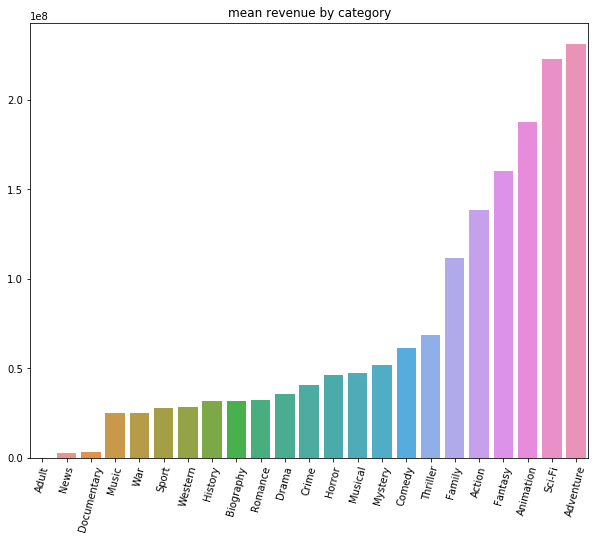

In [107]:
fig = plt.figure(figsize=(10,8));
sns.barplot(data=genres_info.sort_values(by = "mean_rev")["mean_rev"].to_frame().transpose());

plt.xticks(rotation=75)
plt.title("mean revenue by category");






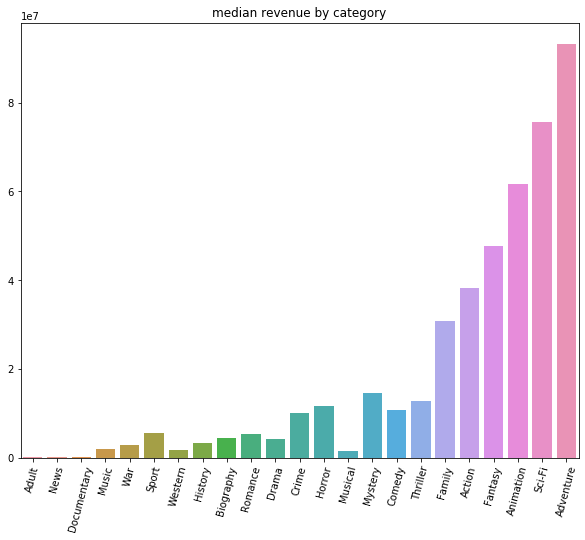

In [106]:
fig = plt.figure(figsize=(10,8));
sns.barplot(data=genres_info.sort_values(by = "mean_rev")["median_rev"].to_frame().transpose());

plt.xticks(rotation=75)

plt.title("median revenue by category");